<a href="https://colab.research.google.com/github/mehmetakifkucuk/googlecolab/blob/main/mermaid_js_Flow_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Sheets Create and Read

In [ ]:
#@title Create
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1zAsN2pj-5ST_78HYIrsMK7f5IxrsbeIIFM_GxDhQy4k',
 'updatedCells': 6,
 'updatedColumns': 3,
 'updatedRange': 'Sayfa1!A1:C2',
 'updatedRows': 2}

In [ ]:
#@title Read
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# worksheet = gc.open('A new spreadsheet').sheet1
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1-StACHtxNqbERtwBtgVxLjYAQDHczxc7cyMV8AdPtw0/edit#gid=2018370990')
sheet = wb.worksheet('Dependencies')
data = sheet.get_all_values()
# get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
# pd.DataFrame.from_records(rows)
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
# df[['mermaid.js Code','mermaid.js Format']]
code = df['mermaid.js Code']
format = df['mermaid.js Format']
data = code.to_string(index=False) + '\n' + format.to_string(index=False)
data

' X.01[N/A - No Pre-requisite]-->A.01[Design - M...\n X.01[N/A - No Pre-requisite]-->A.02[Design - M...\n X.01[N/A - No Pre-requisite]-->A.03[Design - D...\n A.01[Design - Mobile App]-->B.01[Development -...\n A.02[Design - Mobile Web]-->B.02[Development -...\n A.03[Design - Desktop Web]-->B.03[Development ...\n B.01[Development - Mobile App]-->C.01[Test - M...\n B.02[Development - Mobile Web]-->C.02[Test - M...\n B.03[Development - Desktop Web]-->C.03[Test - ...\n X.01[N/A - No Pre-requisite]-->D.01[Blog - WP ...\n D.01[Blog - WP Setup]-->D.02[Blog - Design / T...\n D.02[Blog - Design / Template Check]-->D.03[Bl...\n D.02[Blog - Design / Template Check]-->D.04[Bl...\n D.01[Blog - WP Setup]-->D.05[Blog - Deploy for...\n D.02[Blog - Design / Template Check]-->D.05[Bl...\n D.03[Blog - Plugin / Template Setup]-->D.05[Bl...\n D.01[Blog - WP Setup]-->E.01[Blog Content - Po...\n D.03[Blog - Plugin / Template Setup]-->E.02[Bl...\n D.03[Blog - Plugin / Template Setup]-->E.03[Bl...\n D.03[Blog 

# Execute

In [ ]:
#@title Read from Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
pd.set_option("display.max_colwidth", 100)
gc = gspread.authorize(GoogleCredentials.get_application_default())

# worksheet = gc.open('A new spreadsheet').sheet1
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1-StACHtxNqbERtwBtgVxLjYAQDHczxc7cyMV8AdPtw0/edit#gid=2018370990')
sheet = wb.worksheet('Dependencies')
data = sheet.get_all_values()
# get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.

# pd.DataFrame.from_records(rows)
df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
# code = df['mermaid.js Code'].to_string(justify='left')
# df.to_string(justify='left')
# df[['mermaid.js Code','mermaid.js Format']]
# code = df['mermaid.js Code']
# format = df['mermaid.js Format']
# data = 'graph LR' + '\n'+ df['mermaid.js Code'].to_string(index=False,max_colwidth=100,justify = 'left') + '\n' + df['mermaid.js Format'].to_string(index=False,max_colwidth=100,justify='left')
# data = 'graph LR' + '\n'+ code.to_string(index=False,max_colwidth=100,justify = 'left') + '\n' + format.to_string(index=False,max_colwidth=100,justify='left')
# graph = data
# code.to_csv('graph_text.csv')
# file = open('test.txt', 'a')
# file.write(graph)
# file.close()
df

In [89]:
#@title Generate File Manually
graph = """
graph LR
X.01[N/A - No Pre-requisite]-->A.01[Design - Mobile App]
X.01[N/A - No Pre-requisite]-->A.02[Design - Mobile Web]
X.01[N/A - No Pre-requisite]-->A.03[Design - Desktop Web]
A.01[Design - Mobile App]-->B.01[Development - Mobile App]
A.02[Design - Mobile Web]-->B.02[Development - Mobile Web]
A.03[Design - Desktop Web]-->B.03[Development - Desktop Web]
B.01[Development - Mobile App]-->C.01[Test - Mobile App]
B.02[Development - Mobile Web]-->C.02[Test - Mobile Web]
B.03[Development - Desktop Web]-->C.03[Test - Desktop Web]
X.01[N/A - No Pre-requisite]-->D.01[Blog - WP Setup]
D.01[Blog - WP Setup]-->D.02[Blog - Design / Template Check]
D.02[Blog - Design / Template Check]-->D.03[Blog - Plugin / Template Setup]
D.02[Blog - Design / Template Check]-->D.04[Blog - Multilanguage]
D.01[Blog - WP Setup]-->D.05[Blog - Deploy for Live / SSL, etc.]
D.02[Blog - Design / Template Check]-->D.05[Blog - Deploy for Live / SSL, etc.]
D.03[Blog - Plugin / Template Setup]-->D.05[Blog - Deploy for Live / SSL, etc.]
D.01[Blog - WP Setup]-->E.01[Blog Content - Post Content -TR-]
D.03[Blog - Plugin / Template Setup]-->E.02[Blog Content - Infographic Content -TR-]
D.03[Blog - Plugin / Template Setup]-->E.03[Blog Content - Quiz Content -TR-]
D.03[Blog - Plugin / Template Setup]-->E.04[Blog Content - Bar Chart Race -TR-]
D.03[Blog - Plugin / Template Setup]-->E.05[Blog Content - Legal Content -TR-]
D.01[Blog - WP Setup]-->E.06[Blog Content - Post Content -EN-]
D.03[Blog - Plugin / Template Setup]-->E.07[Blog Content - Infographic Content -EN-]
D.03[Blog - Plugin / Template Setup]-->E.08[Blog Content - Quiz Content -EN-]
D.03[Blog - Plugin / Template Setup]-->E.09[Blog Content - Bar Chart Race -EN-]
D.03[Blog - Plugin / Template Setup]-->E.10[Blog Content - Legal Content -EN-]
X.01[N/A - No Pre-requisite]-->F.01[App Content - Suggested Items]
B.01[Development - Mobile App]-->F.02[App Content - Multilanguage]
B.01[Development - Mobile App]-->F.03[App Content - Initial Items to Enter]
X.01[N/A - No Pre-requisite]-->G.01[Investor Relations - Collecting Investor Information]
X.01[N/A - No Pre-requisite]-->G.02[Investor Relations - Pitch Calendar]
A.01[Design - Mobile App]-->G.03[Investor Relations - MVP Showcase]
D.01[Blog - WP Setup]-->H.01[Support / Chat - Support Center System Setup]
D.01[Blog - WP Setup]-->H.02[Support / Chat - Support Multilanguage]
X.01[N/A - No Pre-requisite]-->H.03[Support / Chat - Operator Assignment]
X.01[N/A - No Pre-requisite]-->H.04[Support / Chat - Chat Setup]
J.02[Legal Establishments - Company Establishment in US]-->I.01[Payment Systems - US Bank Account]
I.01[Payment Systems - US Bank Account]-->I.02[Payment Systems - Stripe Agreement]
I.02[Payment Systems - Stripe Agreement]-->I.03[Payment Systems - Technical Setup]
X.01[N/A - No Pre-requisite]-->J.01[Legal Establishments - Company Establishment in Turkey]
X.01[N/A - No Pre-requisite]-->J.02[Legal Establishments - Company Establishment in US]
X.01[N/A - No Pre-requisite]-->K.01[Marketing - Paid Marketing Plan for Shopper Acq.]
X.01[N/A - No Pre-requisite]-->K.02[Marketing - Paid Marketing Plan for Traveler Acq.]
X.01[N/A - No Pre-requisite]-->K.03[Marketing - Unpaid Marketing Plan -SEO-]
X.01[N/A - No Pre-requisite]-->L.01[People - Hiring]
X.01[N/A - No Pre-requisite]-->L.02[People - Salary Payment]
J.01[Legal Establishments - Company Establishment in Turkey]-->M.01[Legal Responsibilities - Tax Payment]
J.02[Legal Establishments - Company Establishment in US]-->M.01[Legal Responsibilities - Tax Payment]

C.01[Test - Mobile App]-->Z.01[GO LIVE - GO LIVE]
D.05[Blog - Deploy for Live / SSL, etc.]-->Z.01[GO LIVE - GO LIVE]
E.11[Blog Content - Content - TR]-->Z.01[GO LIVE - GO LIVE]
E.12[Blog Content - Content - EN]-->Z.01[GO LIVE - GO LIVE]
H.01[Support / Chat - Support Center System Setup]-->Z.01[GO LIVE - GO LIVE]
H.04[Support / Chat - Chat Setup]-->Z.01[GO LIVE - GO LIVE]
I.03[Payment Systems - Technical Setup]-->Z.01[GO LIVE - GO LIVE]
J.01[Legal Establishments - Company Establishment in Turkey]-->Z.01[GO LIVE - GO LIVE]
F.01[App Content - Suggested Items]-->Z.01[GO LIVE - GO LIVE]
F.03[App Content - Initial Items to Enter]-->Z.01[GO LIVE - GO LIVE]
N.06[Communication - All]-->Z.01[GO LIVE - GO LIVE]
B.01[Development - Mobile App]-->N.01[Communication - Email - TR]
B.01[Development - Mobile App]-->N.02[Communication - Email - EN]
B.01[Development - Mobile App]-->N.03[Communication - Notification - TR]
B.01[Development - Mobile App]-->N.04[Communication - Notification - EN]
B.01[Development - Mobile App]-->N.05[Communication - Chat Notification]
N.01[Communication - Email - TR]-->N.06[Communication - All]
N.02[Communication - Email - EN]-->N.06[Communication - All]
N.03[Communication - Notification - TR]-->N.06[Communication - All]
N.04[Communication - Notification - EN]-->N.06[Communication - All]
N.05[Communication - Chat Notification]-->N.06[Communication - All]
E.01[Blog Content - Post Content -TR-]-->E.11[Blog Content - Content - TR]
E.02[Blog Content - Infographic Content -TR-]-->E.11[Blog Content - Content - TR]
E.03[Blog Content - Quiz Content -TR-]-->E.11[Blog Content - Content - TR]
E.04[Blog Content - Bar Chart Race -TR-]-->E.11[Blog Content - Content - TR]
E.05[Blog Content - Legal Content -TR-]-->E.11[Blog Content - Content - TR]
E.06[Blog Content - Post Content -EN-]-->E.12[Blog Content - Content - EN]
E.07[Blog Content - Infographic Content -EN-]-->E.12[Blog Content - Content - EN]
E.08[Blog Content - Quiz Content -EN-]-->E.12[Blog Content - Content - EN]
E.09[Blog Content - Bar Chart Race -EN-]-->E.12[Blog Content - Content - EN]
E.10[Blog Content - Legal Content -EN-]-->E.12[Blog Content - Content - EN]

style A.01 stroke:green, stroke-width:5px
style A.02 stroke:green, stroke-width:5px
style A.03 stroke:green, stroke-width:5px
style B.01 stroke:green, stroke-width:5px
style B.02 stroke:yellow, stroke-width:5px
style B.03 stroke:yellow, stroke-width:5px
style C.01 stroke:red, stroke-width:5px
style C.02 stroke:red, stroke-width:5px
style C.03 stroke:red, stroke-width:5px
style D.01 stroke:green, stroke-width:5px
style D.02 stroke:green, stroke-width:5px
style D.03 stroke:green, stroke-width:5px
style D.04 stroke:red, stroke-width:5px
style D.05 stroke:red, stroke-width:5px
style D.05 stroke:red, stroke-width:5px
style D.05 stroke:red, stroke-width:5px
style E.01 stroke:yellow, stroke-width:5px
style E.02 stroke:pink, stroke-width:5px
style E.03 stroke:pink, stroke-width:5px
style E.04 stroke:red, stroke-width:5px
style E.05 stroke:green, stroke-width:5px
style E.06 stroke:red, stroke-width:5px
style E.07 stroke:red, stroke-width:5px
style E.08 stroke:red, stroke-width:5px
style E.09 stroke:red, stroke-width:5px
style E.10 stroke:red, stroke-width:5px
style F.01 stroke:red, stroke-width:5px
style F.02 stroke:red, stroke-width:5px
style F.03 stroke:red, stroke-width:5px
style G.01 stroke:red, stroke-width:5px
style G.02 stroke:red, stroke-width:5px
style G.03 stroke:green, stroke-width:5px
style H.01 stroke:yellow, stroke-width:5px
style H.02 stroke:red, stroke-width:5px
style H.03 stroke:red, stroke-width:5px
style H.04 stroke:red, stroke-width:5px
style I.01 stroke:green, stroke-width:5px
style I.02 stroke:green, stroke-width:5px
style I.03 stroke:yellow, stroke-width:5px
style J.01 stroke:green, stroke-width:5px
style J.02 stroke:green, stroke-width:5px
style K.01 stroke:pink, stroke-width:5px
style K.02 stroke:pink, stroke-width:5px
style K.03 stroke:red, stroke-width:5px
style L.01 stroke:red, stroke-width:5px
style L.02 stroke:red, stroke-width:5px
style M.01 stroke:red, stroke-width:5px
style M.01 stroke:red, stroke-width:5px
style X.01 stroke:green, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style Z.01 stroke:red, stroke-width:5px
style N.01 stroke:red, stroke-width:5px
style N.02 stroke:red, stroke-width:5px
style N.03 stroke:red, stroke-width:5px
style N.04 stroke:red, stroke-width:5px
style N.05 stroke:red, stroke-width:5px
style N.06 stroke:red, stroke-width:5px
style N.06 stroke:red, stroke-width:5px
style N.06 stroke:red, stroke-width:5px
style N.06 stroke:red, stroke-width:5px
style N.06 stroke:red, stroke-width:5px
style E.11 stroke:green, stroke-width:5px
style E.11 stroke:green, stroke-width:5px
style E.11 stroke:green, stroke-width:5px
style E.11 stroke:green, stroke-width:5px
style E.11 stroke:green, stroke-width:5px
style E.12 stroke:red, stroke-width:5px
style E.12 stroke:red, stroke-width:5px
style E.12 stroke:red, stroke-width:5px
style E.12 stroke:red, stroke-width:5px
style E.12 stroke:red, stroke-width:5px
"""

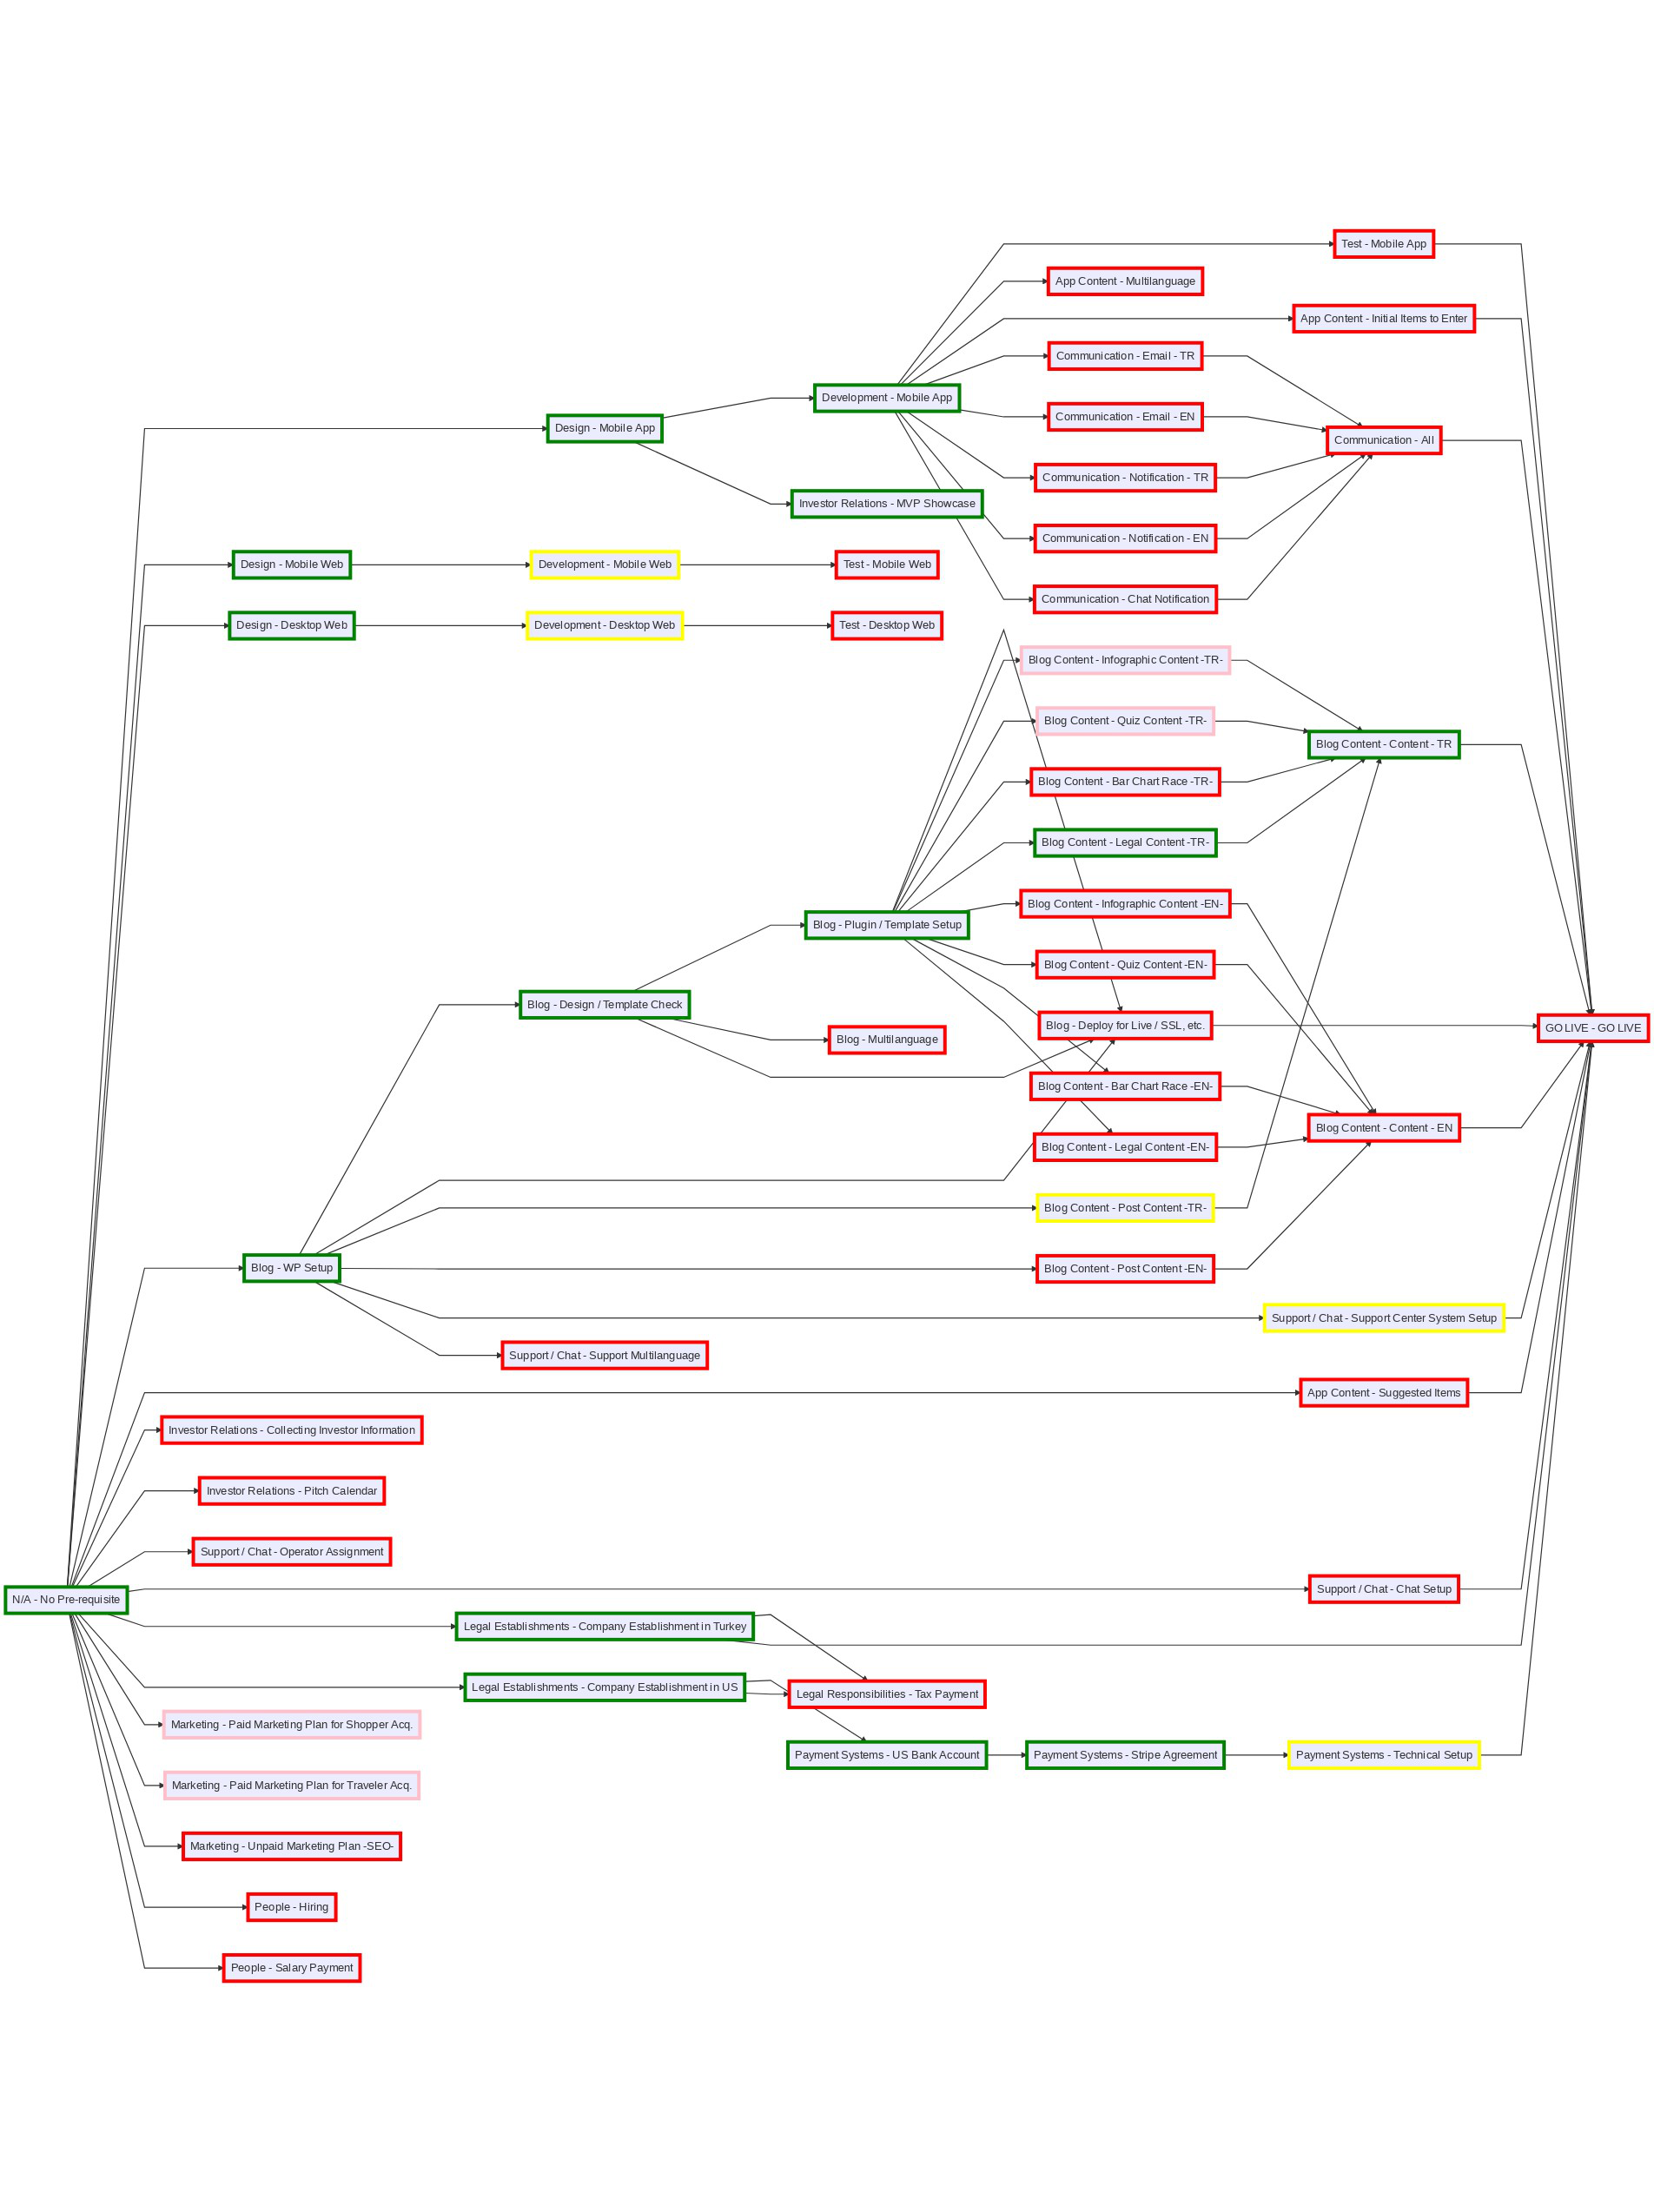

In [90]:
import base64

graphbytes = graph.encode("ascii")

base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")

import requests, io
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
# plt.imshow(img)
# plt.savefig(img,"test.svg", format="svg")
img

# Garbage

In [ ]:
graph

'\ngraph LR\nX.01[N/A - No Pre-requisite]-->A.01[Design - Mobile App]\nX.01[N/A - No Pre-requisite]-->A.02[Design - Mobile Web]\nX.01[N/A - No Pre-requisite]-->A.03[Design - Desktop Web]\nA.01[Design - Mobile App]-->B.01[Development - Mobile App]\nA.02[Design - Mobile Web]-->B.02[Development - Mobile Web]\nA.03[Design - Desktop Web]-->B.03[Development - Desktop Web]\nB.01[Development - Mobile App]-->C.01[Test - Mobile App]\nB.02[Development - Mobile Web]-->C.02[Test - Mobile Web]\nB.03[Development - Desktop Web]-->C.03[Test - Desktop Web]\nX.01[N/A - No Pre-requisite]-->D.01[Blog - WP Setup]\nD.01[Blog - WP Setup]-->D.02[Blog - Design / Template Check]\nD.02[Blog - Design / Template Check]-->D.03[Blog - Plugin / Template Setup]\nD.02[Blog - Design / Template Check]-->D.04[Blog - Multilanguage]\nD.01[Blog - WP Setup]-->D.05[Blog - Deploy for Live / SSL, etc.]\nD.02[Blog - Design / Template Check]-->D.05[Blog - Deploy for Live / SSL, etc.]\nD.03[Blog - Plugin / Template Setup]-->D.05[Blo

In [ ]:
graph

'graph LR\n X.01[N/A - No Pre-requisite]-->A.01[Design - M...\n X.01[N/A - No Pre-requisite]-->A.02[Design - M...\n X.01[N/A - No Pre-requisite]-->A.03[Design - D...\n A.01[Design - Mobile App]-->B.01[Development -...\n A.02[Design - Mobile Web]-->B.02[Development -...\n A.03[Design - Desktop Web]-->B.03[Development ...\n B.01[Development - Mobile App]-->C.01[Test - M...\n B.02[Development - Mobile Web]-->C.02[Test - M...\n B.03[Development - Desktop Web]-->C.03[Test - ...\n X.01[N/A - No Pre-requisite]-->D.01[Blog - WP ...\n D.01[Blog - WP Setup]-->D.02[Blog - Design / T...\n D.02[Blog - Design / Template Check]-->D.03[Bl...\n D.02[Blog - Design / Template Check]-->D.04[Bl...\n D.01[Blog - WP Setup]-->D.05[Blog - Deploy for...\n D.02[Blog - Design / Template Check]-->D.05[Bl...\n D.03[Blog - Plugin / Template Setup]-->D.05[Bl...\n D.01[Blog - WP Setup]-->E.01[Blog Content - Po...\n D.03[Blog - Plugin / Template Setup]-->E.02[Bl...\n D.03[Blog - Plugin / Template Setup]-->E.03[Bl...\n 

In [ ]:
# pd. __version__
# max_colwidth
# sudo pip3 install --upgrade pandas